### Cho dữ liệu như pov_12.csv
1. Chuẩn hóa dữ liệu X chứa cột 0, 1
2. Tìm số cụm k phù hợp
3. Áp dụng thuật toán GMM để giải bài toán phân cụm với số cụm = k ở câu 2
4. Cho X_test = np.array([[0.1, 0.1], [0.8,0.8], [0.5, 0.5]]), cho biết những phần tử này thuộc cụm nào?
5. Vẽ hình, xem kết quả

In [1]:
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.mixture import GaussianMixture
from sklearn import metrics

In [2]:
data = pd.read_csv("../../Data/pov_12.csv", sep=" ", header=None)
print(data.shape)
data.head()

(150, 3)


,0,1,2
0,0.109393,0.085409,Cluster1
1,0.082571,0.101796,Cluster1
2,0.084990,0.113641,Cluster1
3,0.114611,0.115524,Cluster1
4,0.097356,0.095484,Cluster1


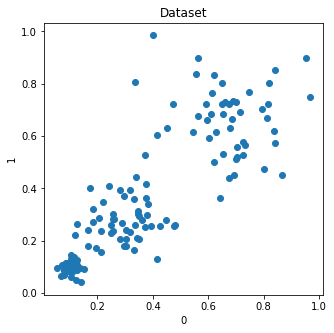

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(data[0], data[1])
plt.title('Dataset')
plt.xlabel("0")
plt.ylabel("1")
plt.show()

In [4]:
X_train = data[[0,1]]

In [5]:
list_sil = [] # chua danh sach cac gia tri sil
K = range(2,8) # chua danh sach cac k
for k in K:
    gmm = GaussianMixture(n_components=k) # 2, 3, 4...
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    # k = 2 => 0,1
    # k = 3 => 0, 1, 2
    sil = metrics.silhouette_score(X_train, labels, metric='euclidean')
    list_sil.append(sil)

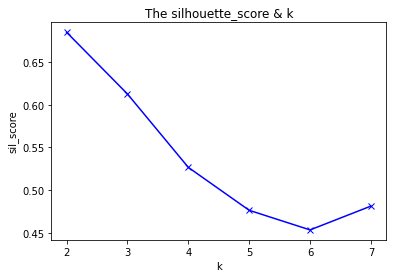

In [6]:
# Plot
plt.plot(K, list_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('sil_score')
plt.title('The silhouette_score & k')
plt.show()

### Select k = 2

In [7]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)

GaussianMixture(n_components=2)

In [8]:
print(gmm.weights_)

[0.33393819 0.66606181]


In [9]:
print(gmm.means_)

[[0.66682326 0.66125669]
 [0.20020692 0.18647424]]


In [10]:
print(gmm.covariances_)

[[[ 0.01872054 -0.00121377]
  [-0.00121377  0.01794757]]

 [[ 0.01339299  0.00880714]
  [ 0.00880714  0.01067513]]]


In [11]:
X_test = np.array([[0.1, 0.1], [0.8,0.8], [0.4, 0.4]])
pred = gmm.predict(X_test)
pred

array([1, 0, 1], dtype=int64)

In [12]:
types = gmm.predict(X_train)

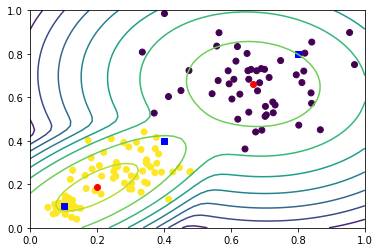

In [13]:
# plot mixture of Gaussians
plt.figure(figsize=(6,4))
X, Y = np.meshgrid(np.linspace(0,1), np.linspace(0,1))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))

plt.contour(X, Y, Z)
plt.scatter(X_train[0], X_train[1], c=types)
plt.scatter(X_test[:,0], X_test[:,1], marker="s", c='b')
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], color="red")
plt.show()